## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## HRV signals

In [3]:
from DDDS.hrv import HRV

In [4]:
hrv = HRV()

Connected successfully!


In [6]:
dataframes = hrv.get_dataframes()

Progress: |██████████████████████████████████████████████████| 100.0% Complete


### RR graph

In [7]:
dataframes['22_11_2021_15_38 eb0']

,Timestamp_Google,Timestamp_Device,Device_id,Heart_Rate,RR_rate,Garmin
0,2021-11-22 14:39:25.428,2021-11-22 14:39:25.655,FD:9E:84:03:87:71,77,[],1
1,2021-11-22 14:39:25.599,2021-11-22 14:39:25.827,CA:93:07:67:1E:FF,80,"[779, 743]",1
2,2021-11-22 14:39:25.832,2021-11-22 14:39:26.046,CD:87:AB:E8:05:12,88,"[724, 832]",1
3,2021-11-22 14:39:25.867,2021-11-22 14:39:26.093,FD:9E:84:03:87:71,77,[],1
4,2021-11-22 14:39:26.391,2021-11-22 14:39:26.608,FD:9E:84:03:87:71,78,[794],1
...,...,...,...,...,...,...
16725,2021-11-22 15:48:44.599,2021-11-22 15:48:44.821,FD:9E:84:03:87:71,0,[],1
16726,2021-11-22 15:48:44.676,2021-11-22 15:48:44.899,CD:87:AB:E8:05:12,97,"[1240, 621]",1
16727,2021-11-22 15:48:45.129,2021-11-22 15:48:45.352,FD:9E:84:03:87:71,0,[],1
16728,2021-11-22 15:48:45.612,2021-11-22 15:48:45.852,FD:9E:84:03:87:71,0,[],1


In [8]:
series_RR, x_RR = hrv.get_RR_series('22_11_2021_15_38 eb0')

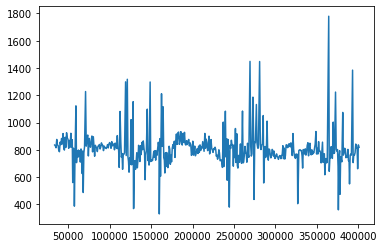

In [13]:
window_start, window_end = 40, 500
plt.plot(x_RR[window_start:window_end], series_RR[window_start:window_end])